# Visualizing Earnings Based On College Majors #

## Introduction ##

Here we are attempting to find the correlation between earning of individuals and their college majors. The main question we are going to ask in this project is, Do earnings change drastically with the Major someone has chosen during their college days. We will try to answer this question with the help of various plot.

In order to help us analyse the earning potential of various College Majors, We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

## Reading Data ##

Since we have read the dataset, let us get to know the data points mentioned in the dataset. Let us get to know the column names, the first few rows and last few rows.

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

## Understanding the Data Points ##
Let us learn more about the given column names. It is really important to understand what each data points are telling us. So below is each column name and its description.

| Column Name | Description |
| -: | -: | 
| Rank | Ranked in ascending order of the Median earning |
| Major_code | Code corresponding to each College Major |
| Major | Name of the College Major |
| Total | Total Number of people with a major |
| Men | Number of Men enrolled for a major |
| Women	| Number of Women enrolled for a major |
| Major_category | Category under which the major falls |
| ShareWomen | Percentage of Women in a Major |
| Sample_size | Sample size (probably the colleges) used to collect the data |
| Employed | Total number of people employed |
| Full_time	| Number of people who are employed full time, ie. working 35 hours or more per week |
| Part_time	| Number of people who are employed part time, ie. working less than 35 hours per week |
| Full_time_year_round | Number of people who are Employed at least 50 weeks in a year for more than 35 hours per week |
| Unemployed | Total number of people who are unemployed |
| Unemployment_rate | Fraction obtained by calculting Unemployed / (Unemployed + Employed) |
| Median | Median value of earnings of full-time, year-round workers |
| P25th	| 25th percentile of earnings of full-time, year-round workers |
| P75th	| 75th percentile of earnings of full-time, year-round workers |
| College_jobs | Number of Jobs that require a college degree |
| Non_college_jobs | Number of Jobs that does not require a college degree |
| Low_wage_jobs	| Number of Low wage jobs |

Now let us look at the top end and bottom end of the dataset

In [4]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


## Initial Inferences ##

The dataset is basically shows the ranking of various College Majors based on their median earning values. So the dataset is ordered in the descenidng order of Median earning. The major ranked first is the one with highest median earning and the one at the end is the major with lowest median earning.

- Looking at the first row we can see that Petroleum Engineering, a major that falls under Engineering disciplines has the highest median earning among all other majors listed here. Looks like the percentage of women is only 12% in this major
- Looking at the perentage of women in the high paying majors, except for the 5th rank, Chemical engineering, the percentage is below 15%. Percentage of women in the high paying majors are less, it seems from the initial observation.
- Looking at the lowest paying majors, looks like the percentage of women are quite high there, last one reaching 88%.

Now let us look at some of the descriptive stats of the dataset.

### Some Stats ###

In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Cleaning Dataset ##
Looks like there are a few data missing in certain column. Let us check that and drop the rows containing missing values.

In [7]:
print(recent_grads.shape[0])
recent_grads.dropna(inplace=True)
print(recent_grads.shape[0])

173
172


So we have successfully removed the missing values and now the dataset has 172 rows. Let us check and confirm this.

In [8]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
Rank                    172 non-null int64
Major_code              172 non-null int64
Major                   172 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          172 non-null object
ShareWomen              172 non-null float64
Sample_size             172 non-null int64
Employed                172 non-null int64
Full_time               172 non-null int64
Part_time               172 non-null int64
Full_time_year_round    172 non-null int64
Unemployed              172 non-null int64
Unemployment_rate       172 non-null float64
Median                  172 non-null int64
P25th                   172 non-null int64
P75th                   172 non-null int64
College_jobs            172 non-null int64
Non_college_jobs        172 non-null int64
Low_wage_jobs          

In [10]:
recent_grads.describe(include="all")

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172,172.000000,172.000000,172.000000,172,172.000000,172.000000,172.00000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
unique,NaN,NaN,172,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,ZOOLOGY,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.377907,3895.953488,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,357.941860,31355.80814,...,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,619.680419,50777.42865,...,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.00000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,42.000000,3734.75000,...,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,131.000000,12031.50000,...,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,339.000000,31701.25000,...,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000


Looks like we have removed all the null values and the dataset is clean.

### Analysing various datapoints ###

Since we have a clean dataset, we can start looking for correlations between various factors given in the dataset.

### Most Popular Major v/s (Un)Employment ###
Let us first go after the popular majors. We have a Total column in our dataset which represents the total number of students enrolled for a certain major. If we can find the major with highest value of total, that would be the most popular major.

Will there be a reason for the popularity of the major? Will it be employment opportunity or the high salary? What factors could be contributing to the popularity. Let us get some visualization and check that.

** Most Popular Major v/s All Year Round Employement **

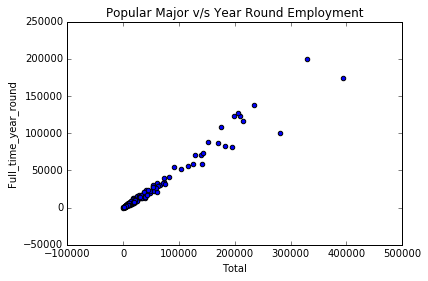

In [14]:
recent_grads.plot("Total", "Full_time_year_round", kind="scatter", 
                  title="Popular Major v/s Year Round Employment")

Looks like there are some strong correlations and almost linear relationship. As the popularity of the major increases (as the total number of students in a certain major increases) the number of students who got Full time job, year round also increased with a few exceptions.

So it looks like some of these majors are popular for a reason. Let us cross check it by comparing the employment rate and unemployment rate as well.

** Most Popular Major v/s Total Number Employed **

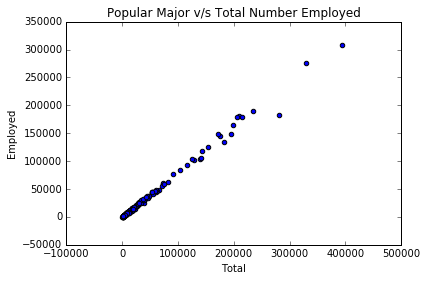

In [21]:
recent_grads.plot(x='Total', y='Employed', kind='scatter',
                 title="Popular Major v/s Total Number Employed")

It looks like the strong correlation between most popuLar major and getting employed are still strongly related. So now all we have to check is if the opposite is also true, ie if increase in popularity decreases the number of unemployed.

** Most Popular Major v/s Unemployement rate **

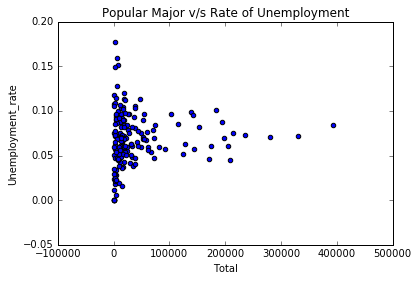

In [22]:
recent_grads.plot(x="Total", y="Unemployment_rate", kind="scatter",
                 title="Popular Major v/s Rate of Unemployment")

Though the correlation is not as strong as the others, we can clearly see that for less popular majors, the unemployment rate is quite concentrated, some are very high, some are how but majority of them are in the middle. So probably because of this very reason, these majors are taken up by less people.

Now that we have infered one of the possible reasons behind certain majors being less popular, let us go ahead and see if popular major also translated into better earning opportunities.

** Most Popular Major v/s Earning Potential **

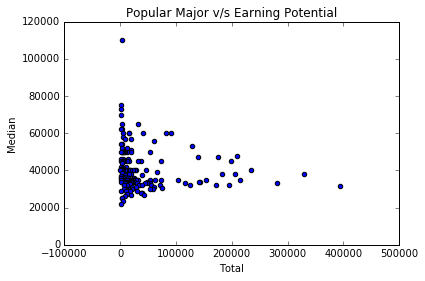

In [23]:
recent_grads.plot(x="Total", y="Median", kind="scatter",
                 title="Popular Major v/s Earning Potential")

This is a rather surprising result. Looks like the least popular majors actually have more income potential from this data. This could mean a few things

- The least popular major can be hard to get in majors or very specialised major and offers great earning potential
- The most popular jobs offer better employment, at the same time due to oversaturation the earning potential is lesser for such majors.
- Or the sample size is too small to make right predictions.

So lets check sample size and earning potential ** Sample Size v/s Earning Potential **

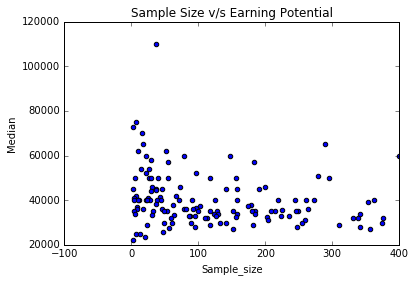

In [27]:
recent_grads.plot(x="Sample_size", y="Median", kind="scatter",
                 title="Sample Size v/s Earning Potential", xlim=(-100,400), ylim=(20000,120000))

Looks like there are not much relationship between sample size and earning median. But we can see that if the sample size is small, there are more higher values. This could be due to low number of sample data.

In [33]:
recent_grads[["Major", "Total", "Sample_size", "Median"]].sort_values("Total").head(10)

,Major,Total,Sample_size,Median
73,MILITARY TECHNOLOGIES,124.0,4,40000
52,MATHEMATICS AND COMPUTER SCIENCE,609.0,7,42000
112,SOIL SCIENCE,685.0,4,35000
33,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,720.0,5,50000
1,MINING AND MINERAL ENGINEERING,756.0,7,75000
120,EDUCATIONAL ADMINISTRATION AND SUPERVISION,804.0,5,34000
55,SCHOOL STUDENT COUNSELING,818.0,4,41000
2,METALLURGICAL ENGINEERING,856.0,3,73000
172,LIBRARY SCIENCE,1098.0,2,22000
19,COURT REPORTING,1148.0,14,54000


This table is quite interesting since this 10 values include the highest paying major and the lowest paying job.

This table is created by sorting the total number of students

This table tells us that popularity or the course doesn't have much to do with earning option because the 5th least popular major according to the data earns the most and the 8th least popular major earns the 2nd highest.

At the same time, the 9th least major earns the least amount of salary. But the interesting thing in all these three observations are, the sample size available is very less. We are inferring things from 2,3 and 7 sample sets!

In [39]:
recent_grads[["Major", "Total", "Sample_size", "Median"]].sort_values("Total", ascending=False).head(10)

,Major,Total,Sample_size,Median
145,PSYCHOLOGY,393735.0,2584,31500
76,BUSINESS MANAGEMENT AND ADMINISTRATION,329927.0,4212,38000
123,BIOLOGY,280709.0,1370,33400
57,GENERAL BUSINESS,234590.0,2380,40000
93,COMMUNICATIONS,213996.0,2394,35000
34,NURSING,209394.0,2554,48000
77,MARKETING AND MARKETING RESEARCH,205211.0,2684,38000
40,ACCOUNTING,198633.0,2042,45000
137,ENGLISH LANGUAGE AND LITERATURE,194673.0,1436,32000
78,POLITICAL SCIENCE AND GOVERNMENT,182621.0,1387,38000


Let us quickly have a look at the majors with highest number of people enrolled. Psychology appears to be the most popular major but clearly it is not the highest earner. In fact out of the top 10 popular majors, the first 30 highest earning majors are not present. So with almost a good certainty we can say that popularity of the majors and earning potential don't have much correlation.

**The only solid conclusion** we can arrive from these observations is that Total number enrolled in a major can't be considered to be the popularity of the subject and it the correlation between Total people enrolled and its earning potential can't be accurately predicted with such small numbers of sample size.

## Gender Bias and Earning Potential ##
With the given data, now let us explore if there is any gender biases with the earning potential. Are women getting paid more than men or is it the opposite? We will try to explore these points using scatter plot

**Percentage of Women v/s Earning Potential**

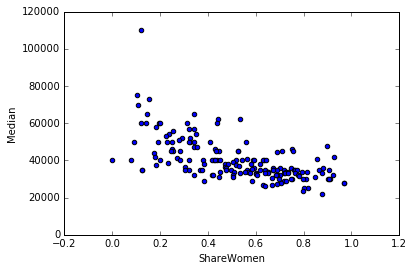

In [40]:
recent_grads.plot(x="ShareWomen", y="Median", kind="scatter")

There is a weak correlation between percentage of women and their earning potential. As the percentage of women increased in a certain major, the earning potential gradually decreased. So it says, the majors with majority of women are tend to get paid less and the opposite is also seems to be right. The subjects where men are a majority tend to get paid more. Probably some of the male dominated and more riskier job profiles pays more. We can verify it with the table below.

In [46]:
recent_grads[["Major", "Men", "Women", "Sample_size", "Median", 
              "ShareWomen"]].sort_values("ShareWomen").head(10)

,Major,Men,Women,Sample_size,Median,ShareWomen
73,MILITARY TECHNOLOGIES,124.0,0.0,4,40000,0.000000
66,MECHANICAL ENGINEERING RELATED TECHNOLOGIES,4419.0,371.0,71,40000,0.077453
26,CONSTRUCTION SERVICES,16820.0,1678.0,295,50000,0.090713
1,MINING AND MINERAL ENGINEERING,679.0,77.0,7,75000,0.101852
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1123.0,135.0,16,70000,0.107313
8,MECHANICAL ENGINEERING,80320.0,10907.0,1029,60000,0.119559
0,PETROLEUM ENGINEERING,2057.0,282.0,36,110000,0.120564
106,TRANSPORTATION SCIENCES AND TECHNOLOGIES,13257.0,1893.0,180,35000,0.124950
111,FORESTRY,3156.0,451.0,48,35000,0.125035
11,AEROSPACE ENGINEERING,12953.0,2105.0,147,60000,0.139793


In [48]:
recent_grads[["Major", "Men", "Women", "Sample_size", "Median", 
              "ShareWomen"]].sort_values("ShareWomen", ascending=False).head(10)

,Major,Men,Women,Sample_size,Median,ShareWomen
164,EARLY CHILDHOOD EDUCATION,1167.0,36422.0,342,28000,0.968954
163,COMMUNICATION DISORDERS SCIENCES AND SERVICES,1225.0,37054.0,95,28000,0.967998
51,MEDICAL ASSISTING SERVICES,803.0,10320.0,67,42000,0.927807
138,ELEMENTARY EDUCATION,13029.0,157833.0,1629,32000,0.923745
150,FAMILY AND CONSUMER SCIENCES,5166.0,52835.0,518,30000,0.910933
100,SPECIAL NEEDS EDUCATION,2682.0,26057.0,246,35000,0.906677
156,HUMAN SERVICES AND COMMUNITY ORGANIZATION,885.0,8489.0,89,30000,0.905590
151,SOCIAL WORK,5137.0,48415.0,374,30000,0.904075
34,NURSING,21773.0,187621.0,2554,48000,0.896019
88,MISCELLANEOUS HEALTH MEDICAL PROFESSIONS,1589.0,11797.0,81,36000,0.881294


One of the top 5 high paying jobs, the women participation is less than 15 percentage. The majors where women percentage is more than 90%, except for one major all the others are in the last 72 ranks in terms of earning potential.

**Here the conclusion** we can draw is that some of the male dominated professions are earn way more than women dominated majors.

## Full Time Employement and Earning Potential
The graph checks if there is any relations between full time employment and earning potential. Are these people with full time job year around getting more salary?

**Full Time Employement v/s Earning Potential**

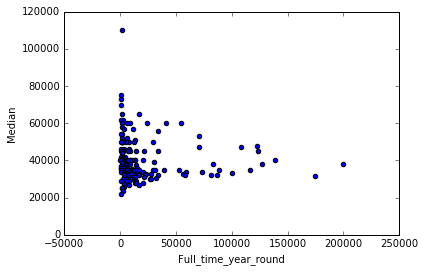

In [51]:
recent_grads.plot(x="Full_time_year_round", y="Median", kind="scatter")

It appears that only a less people with full time year round employement makes higher earning. This interesting value could also be due to small sample sizes.

**Full Time v/s Earning Potential**

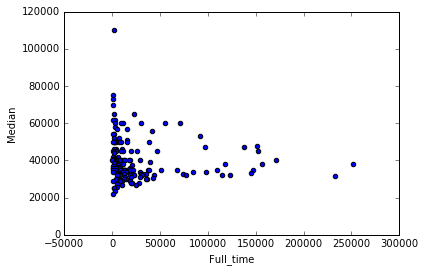

In [47]:
recent_grads.plot(x="Full_time", y="Median", kind="scatter")

**Part Time v/s Earning Potential**

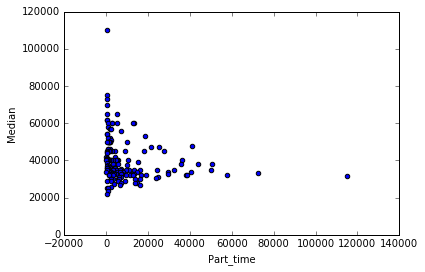

In [52]:
recent_grads.plot(x="Part_time", y="Median", kind="scatter")

It looks like there is no relationship between Full time year round, full time and part time against the earning potential from the given data. But we can see that very less number of people in certain majors does make higher income and the opposite is also true. It could be because of small sample size or the nature of the major.

## Normalising the full/part time jobs 
To analyse better, let us find the percentage of number of people in full time and part time jobs In order to do that, we will find the fraction of these people out of the total number of people in a major.

In [54]:
fullyear_round_percentage = recent_grads["Full_time_year_round"]/recent_grads["Total"]
fulltime_percentage = recent_grads["Full_time"]/recent_grads["Total"]
parttime_percentage = recent_grads["Part_time"]/recent_grads["Total"]

recent_grads["fullyear_round_percentage"] = fullyear_round_percentage
recent_grads["fulltime_percentage"] = fulltime_percentage
recent_grads["parttime_percentage"] = parttime_percentage

recent_grads.head(1)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,fullyear_round_percentage,fulltime_percentage,parttime_percentage
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,0.018381,110000,95000,125000,1534,364,193,0.516032,0.790509,0.115434


Now let us create visulization using the newly created values and see if there are any changes.

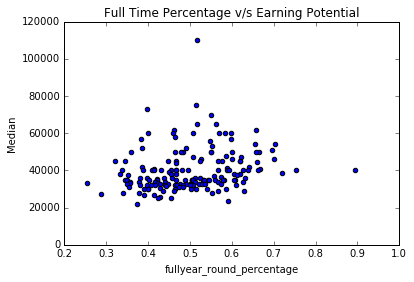

In [56]:
recent_grads.plot("fullyear_round_percentage", "Median", kind="scatter", 
                  title="Full Time Percentage v/s Earning Potential")

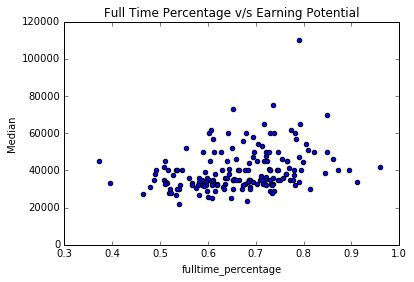

In [60]:
recent_grads.plot("fulltime_percentage", "Median", kind="scatter",
                 title="Full Time Percentage v/s Earning Potential")

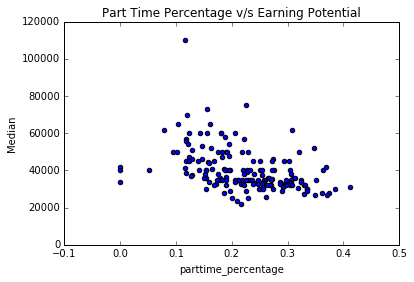

In [61]:
recent_grads.plot("parttime_percentage", "Median", kind="scatter",
                 title="Part Time Percentage v/s Earning Potential")

In these plots we can find a very weak relationship between the percentages and the earning potential.

In the case of Full time jobs, as the percentage increased, the earning potential also increased slightly. But for part time jobs, the earning potential decreased very slightly with the increase in percentage of number of people in a particualr major with part time jobs. Also there are only less than 50% people are into part time jobs out of the total number of people in a major.

So from these **the conclusion** is that Part time job is not much in demand. It also not offers higher earning potential for a majority of people.

We can also look intot the actual dataset to try to get an idea about this conclusion.

In [63]:
recent_grads[['Major','fullyear_round_percentage','fulltime_percentage', 'parttime_percentage',
              'Sample_size', 'Median', 'Total']
            ].sort_values('Median', ascending=False).head(10)

,Major,fullyear_round_percentage,fulltime_percentage,parttime_percentage,Sample_size,Median,Total
0,PETROLEUM ENGINEERING,0.516032,0.790509,0.115434,36,110000,2339.0
1,MINING AND MINERAL ENGINEERING,0.513228,0.735450,0.224868,7,75000,756.0
2,METALLURGICAL ENGINEERING,0.397196,0.651869,0.155374,3,73000,856.0
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,0.550079,0.849762,0.119237,16,70000,1258.0
4,CHEMICAL ENGINEERING,0.517576,0.718227,0.160570,289,65000,32260.0
5,NUCLEAR ENGINEERING,0.563156,0.792072,0.102604,17,65000,2573.0
6,ACTUARIAL SCIENCE,0.657135,0.774159,0.078369,51,62000,3777.0
7,ASTRONOMY AND ASTROPHYSICS,0.461496,0.605469,0.308594,10,62000,1792.0
10,COMPUTER ENGINEERING,0.568605,0.729743,0.123875,399,60000,41542.0
13,MATERIALS SCIENCE,0.459687,0.642907,0.205188,22,60000,4279.0


In [64]:
recent_grads[['Major','fullyear_round_percentage','fulltime_percentage', 'parttime_percentage',
              'Sample_size', 'Median', 'Total']
            ].sort_values('Median').head(10)

,Major,fullyear_round_percentage,fulltime_percentage,parttime_percentage,Sample_size,Median,Total
172,LIBRARY SCIENCE,0.373406,0.540073,0.215847,2,22000,1098.0
171,COUNSELING PSYCHOLOGY,0.591872,0.681799,0.208604,21,23400,4626.0
169,EDUCATIONAL PSYCHOLOGY,0.424317,0.647512,0.200420,7,25000,2854.0
170,CLINICAL PSYCHOLOGY,0.455603,0.607470,0.228330,13,25000,2838.0
168,ZOOLOGY,0.428351,0.599715,0.260435,47,26000,8409.0
167,COMPOSITION AND RHETORIC,0.413233,0.534005,0.348863,151,27000,18953.0
166,DRAMA AND THEATER ARTS,0.390552,0.581447,0.369812,357,27000,43249.0
165,OTHER FOREIGN LANGUAGES,0.286862,0.463852,0.328900,56,27500,11204.0
164,EARLY CHILDHOOD EDUCATION,0.551970,0.733433,0.186251,342,28000,37589.0
163,COMMUNICATION DISORDERS SCIENCES AND SERVICES,0.377753,0.521827,0.362131,95,28000,38279.0


It is time to create some scatter plot to visualise Rank v/s Full time year round percentage, Rank v/s Full time percentage and Rank v/s Part time percentage.

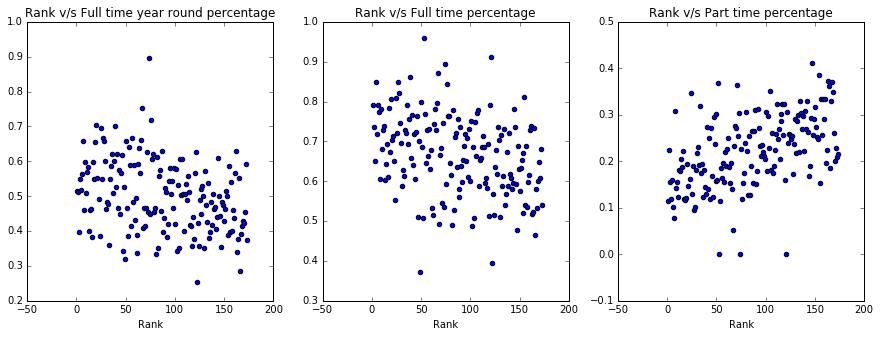

In [77]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
ax1.scatter(recent_grads["Rank"], recent_grads["fullyear_round_percentage"])
ax2.scatter(recent_grads["Rank"], recent_grads["fulltime_percentage"])
ax3.scatter(recent_grads["Rank"], recent_grads["parttime_percentage"])

ax1.set_title("Rank v/s Full time year round percentage")
ax2.set_title("Rank v/s Full time percentage")
ax3.set_title("Rank v/s Part time percentage")

ax1.set_xlabel('Rank')
ax2.set_xlabel('Rank')
ax3.set_xlabel('Rank')

Here also the correlation is not really strong. But we can see that full time percentage slightly decreases with less paying majors while there are more part time jobs available with less paying majors.

The **Conclusion** here is that high paying jobs have more full time job offers while low paying majors offer more part time jobs.

## College/Non College jobs and Influence of income
Now let us briefly look into the different type of jobs out there and how higher earning potential influence it. We are gong to create visualisation for Rank v/s Number of College Jobs, Rank v/s No. of Non College Jobs and Rank v/s Low Wage Jobs.

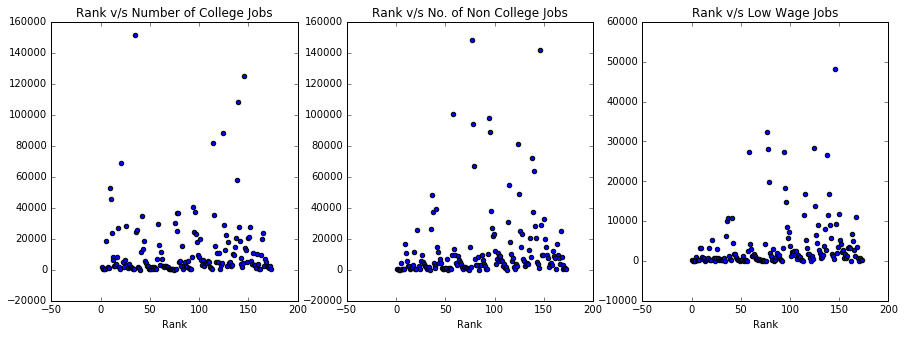

In [109]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))

ax1.scatter(recent_grads["Rank"], recent_grads["College_jobs"])
ax2.scatter(recent_grads["Rank"], recent_grads["Non_college_jobs"])
ax3.scatter(recent_grads["Rank"], recent_grads["Low_wage_jobs"])

ax1.set_title('Rank v/s Number of College Jobs')
ax2.set_title('Rank v/s No. of Non College Jobs')
ax3.set_title('Rank v/s Low Wage Jobs')

ax1.set_xlabel('Rank')
ax2.set_xlabel('Rank')
ax3.set_xlabel('Rank')

Looks like types of jobs don't have much relationship with earning potential. Looks like all types of jobs are predominatly very less over various majors.

## Frequency Analysis
Now that we have looked into the correlations between various factors, let us try and find the frequency distribution of certain factors using Histogram.

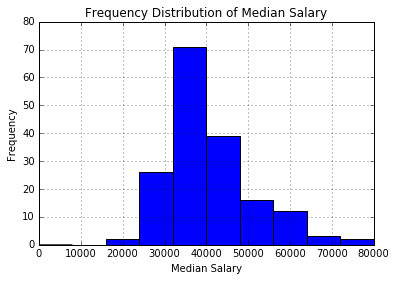

In [100]:
h1 = recent_grads["Median"].hist(bins=10, range=(0,80000))
h1.set_title("Frequency Distribution of Median Salary")
h1.set_xlabel("Median Salary")
h1.set_ylabel("Frequency")

The histogram indicated that majority of the people are earning a salary between 30000 and 40000. Very small percentage of the people are earning the highest salary. And a similar small percentage of people are earning the least amount of salary as well.

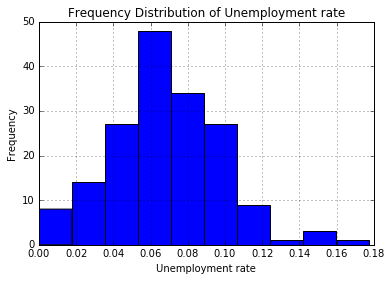

In [111]:
h1 = recent_grads["Unemployment_rate"].hist()

h1.set_title("Frequency Distribution of Unemployment rate")
h1.set_xlabel("Unemployment rate")
h1.set_ylabel("Frequency")

Highest unemployment rate in any major is between 5 to 7.5%

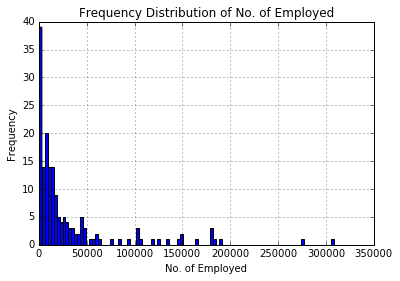

In [123]:
h1 = recent_grads["Employed"].hist(bins=100)

h1.set_title("Frequency Distribution of No. of Employed")
h1.set_xlabel("No. of Employed")
h1.set_ylabel("Frequency")

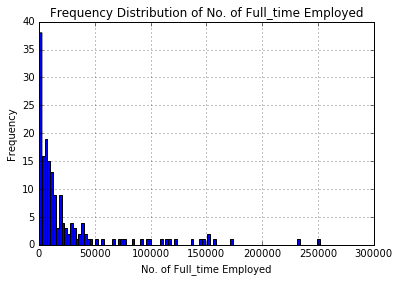

In [126]:
h1 = recent_grads["Full_time"].hist(bins=100)

h1.set_title("Frequency Distribution of No. of Full_time Employed")
h1.set_xlabel("No. of Full_time Employed")
h1.set_ylabel("Frequency")

Very less number of people are full time employed compared to the whole set. This could be due to small sample size.

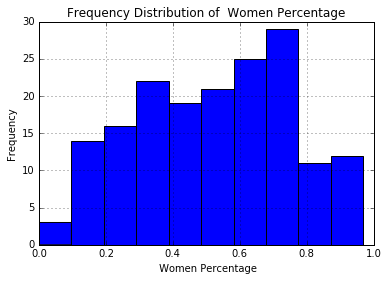

In [128]:
h1 = recent_grads["ShareWomen"].hist()

h1.set_title("Frequency Distribution of  Women Percentage")
h1.set_xlabel(" Women Percentage")
h1.set_ylabel("Frequency")

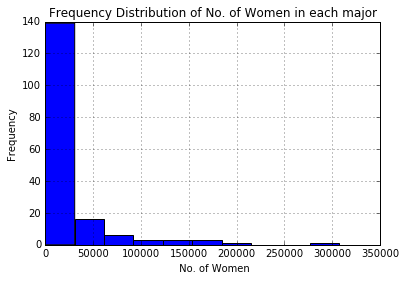

In [130]:
h1 = recent_grads["Women"].hist()

h1.set_title("Frequency Distribution of No. of Women in each major")
h1.set_xlabel(" No. of Women")
h1.set_ylabel("Frequency")

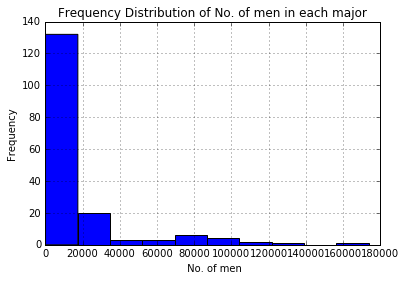

In [132]:
h1 = recent_grads["Men"].hist()

h1.set_title("Frequency Distribution of No. of men in each major")
h1.set_xlabel(" No. of men")
h1.set_ylabel("Frequency")

After analysing the men, women and percentage of women, we can see that there are about 10% of the majors is dominated by women, while another 10% is dominated by men. When we compare the area of the histogram of women percentage, we can see in total, the percentage of women is more in all majors put together.

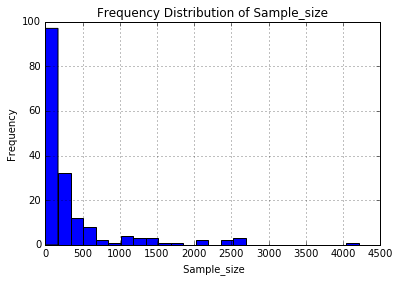

In [135]:
h1 = recent_grads["Sample_size"].hist(bins=25)

h1.set_title("Frequency Distribution of Sample_size")
h1.set_xlabel(" Sample_size")
h1.set_ylabel("Frequency")

Here we can see that the sample size is very small for majority of the data we have. This could have actually affected most of our analyis.

## Application of Scatter Matrix
It is now time to analyse the scatter plots and histogram next to each other using Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7619654c50>,
      dtype=object)

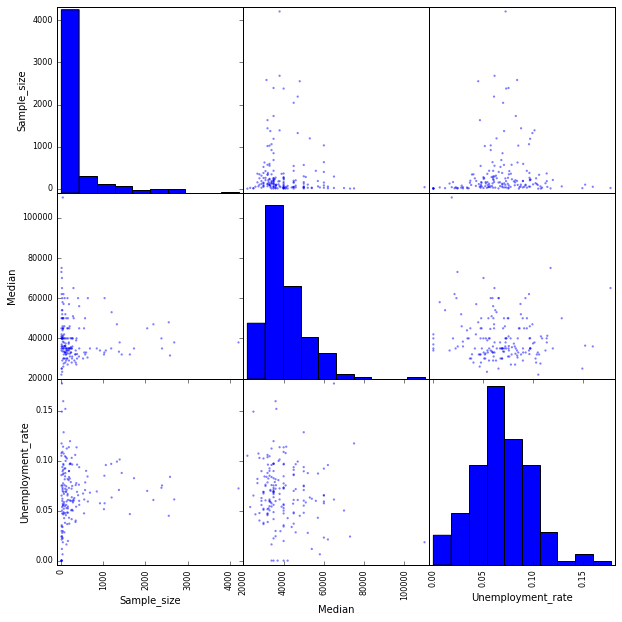

In [138]:
pd.plotting.scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]], figsize=(10,10))

We can see that when the sample size is smaller, unemploment rate and median of earning flucturated from low to high. Since this is doens't offer any correlation, we can't clearly find a relationship between Median and unemployement rate.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f76192bc9e8>,
      dtype=object)

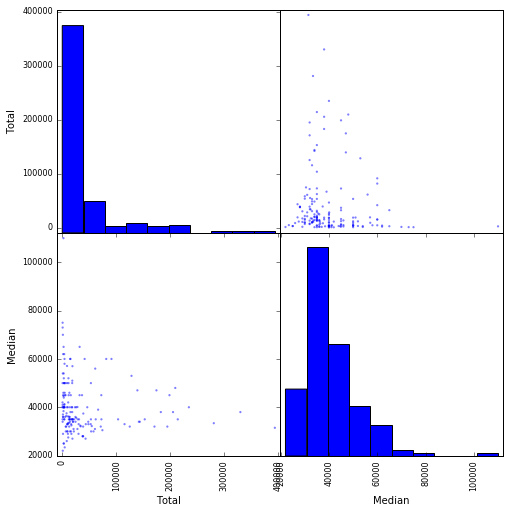

In [139]:
pd.plotting.scatter_matrix(recent_grads[["Total", "Median"]], figsize=(8,8))

Due to the small sample sizes, it looks like both high paying and low paying jobs are concentrated at the least popular ( with less number of total people enrolled) side.

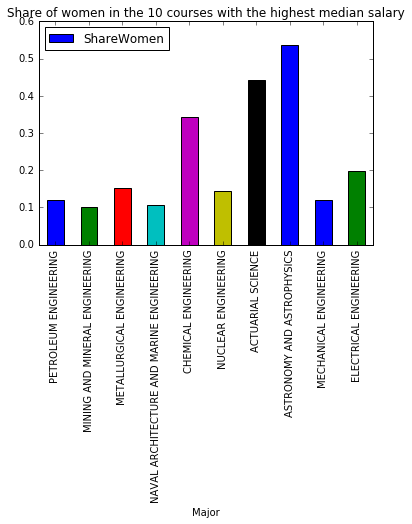

In [149]:
recent_grads.head(10).plot.bar(x="Major", y="ShareWomen",
                               title='Share of women in the 10 courses with the highest median salary')

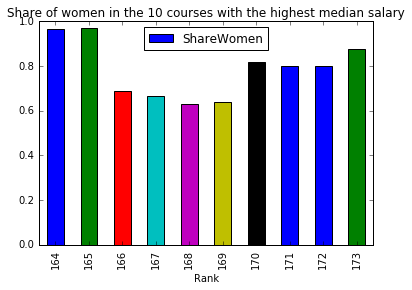

In [152]:
recent_grads.tail(10).plot.bar(x="Rank", y="ShareWomen",
                              title='Share of women in the 10 courses with the highest median salary')

We can see that our previous observations have been proved to be right again with these bar charts. The highest paying majors have less female participation while the lowest paying majors have more female percentage.

Let us verify the Unemployment rate as well for the top and bottom 10 majors based on its earning potential.

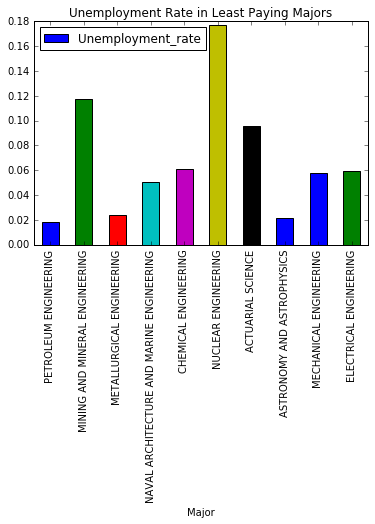

In [158]:
recent_grads.head(10).plot.bar(x="Major", y="Unemployment_rate",
                              title='Unemployment Rate in Least Paying Majors')

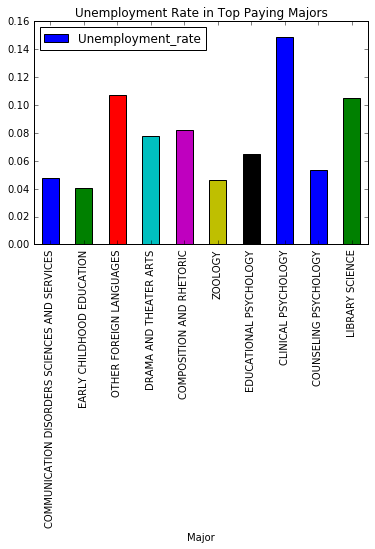

In [159]:
recent_grads.tail(10).plot.bar(x="Major", y="Unemployment_rate",
                              title="Unemployment Rate in Top Paying Majors")

Compared to the highest paying majors, the 10 lowest paying majors have more unemployment rate on an average. Though smaller sample size of the high paying majors might have skewed the observation.

## Finding Popular Major category and its Male Female participation

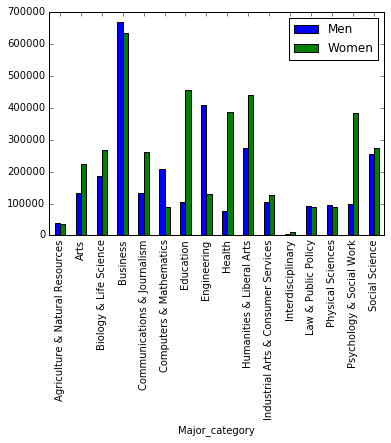

In [174]:
recent_grads[["Men", "Women", "Major_category"]].groupby("Major_category").sum().plot.bar()

Looks like Business is the most in demand Major category and both men and women are pursuing it. Though there is a slight increase in Men's number.

Use a box plot to explore the distributions of median salaries and unemployment rate.

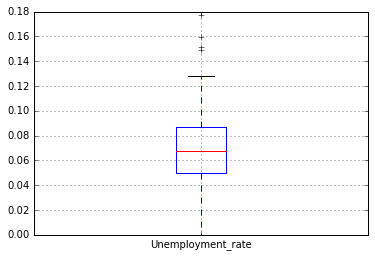

In [179]:
recent_grads.boxplot("Unemployment_rate")

The median value of unemployment rate is around 7.5% and there are many outliers in the data. It could be exceptional cases or it could be due to small sample size.

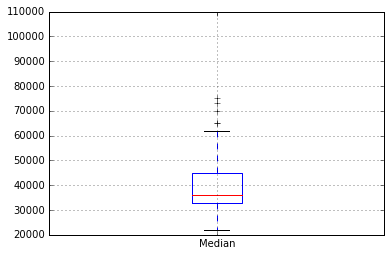

In [180]:
recent_grads.boxplot("Median")